In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset.csv")

In [6]:
data.head()

,OrInterestRate,OrLoanTerm,DTIRat,OrLTV,CreditScore,LoanPurpose,PropertyType,OccStatus,Default
6399224.0,4.500,360,27.0,42,798.0,P,SF,P,0
7956560.0,4.375,360,29.0,90,813.0,P,SF,P,0
9969189.0,4.000,180,43.0,43,675.0,C,SF,P,0
9015691.0,4.990,360,41.0,97,722.0,P,SF,P,0
1132402.0,4.500,360,14.0,18,778.0,P,SF,P,0


In [8]:
data = data.dropna(axis=1, how='any')

In [10]:
data.head()

,OrInterestRate,OrLoanTerm,OrLTV,LoanPurpose,PropertyType,OccStatus,Default
6399224.0,4.500,360,42,P,SF,P,0
7956560.0,4.375,360,90,P,SF,P,0
9969189.0,4.000,180,43,C,SF,P,0
9015691.0,4.990,360,97,P,SF,P,0
1132402.0,4.500,360,18,P,SF,P,0


In [11]:
def getdummies(df):
    columns = df.columns[df.isnull().any()]
    nan_cols = df[columns]

    df.drop(nan_cols.columns, axis=1, inplace=True)

    cat = df.select_dtypes(include=['object'])
    num = df.drop(cat.columns, axis=1)

    data = pd.DataFrame()
    for i in cat.columns:
        tmp = pd.get_dummies(cat[i], drop_first=True)
        data = pd.concat([data, tmp], axis=1)

    df = pd.concat([num,data,nan_cols], axis=1).reset_index(drop=True)
    return df

In [12]:
df = getdummies(data)

In [17]:
df.describe()

,OrInterestRate,OrLoanTerm,OrLTV,Default,P,R,U,CP,MH,PU,SF,P,S
count,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07,2.267538e+07
mean,4.217324e+00,3.168362e+02,7.638714e+01,5.002050e-01,3.017624e-01,4.092098e-01,2.205034e-07,3.032011e-03,4.928252e-03,2.106339e-01,7.208889e-01,9.155994e-01,2.922632e-02
std,5.780380e-01,7.715524e+01,1.485891e+01,5.000000e-01,4.590227e-01,4.916881e-01,4.695779e-04,5.498016e-02,7.002831e-02,4.077589e-01,4.485623e-01,2.779877e-01,1.684403e-01
min,1.750000e+00,6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.875000e+00,3.600000e+02,7.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.320113e+00,3.600000e+02,7.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,4.625000e+00,3.600000e+02,8.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,7.125000e+00,3.600000e+02,9.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [20]:
df.to_csv("data_final.csv")

In [9]:
df.drop([df.columns[0]], axis=1, inplace=True)

In [10]:
row1 = df

In [11]:
row1.head()

,OrInterestRate,OrLoanTerm,OrLTV,Default,P,R,U,CP,MH,PU,SF,P.1,S
18347819,4.248286,180,90,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18058446,4.891540,360,75,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
19474084,4.952406,360,76,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9007210,3.750000,360,93,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19573455,4.898999,360,90,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [12]:
y = row1['Default'].values
X = row1.drop(['Default'], axis=1).values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

C:\Users\Jimit\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [15]:
model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train, y_train)

In [16]:
predict = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6266
           1       0.95      0.92      0.94      6234

   micro avg       0.94      0.94      0.94     12500
   macro avg       0.94      0.94      0.94     12500
weighted avg       0.94      0.94      0.94     12500



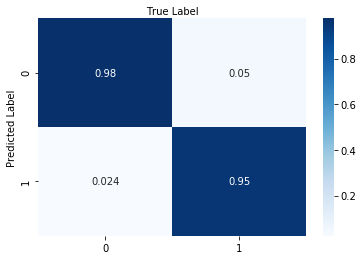

In [59]:
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

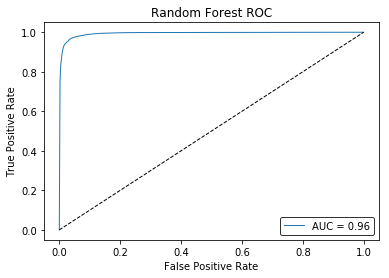

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, predict)

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logisticRegr = LogisticRegression()

logisticRegr = logisticRegr.fit(X_train, y_train)


C:\Users\Jimit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
predict1 = logisticRegr.predict(X_test)

In [22]:
print(classification_report(y_test, predict1))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6266
           1       0.79      0.83      0.81      6234

   micro avg       0.81      0.81      0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.81      0.81      0.81     12500



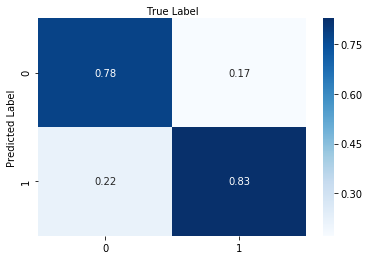

In [69]:
cm = confusion_matrix(y_test, predict1).T
cm = cm.astype('float')/cm.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

In [32]:
from sklearn.svm import SVC

In [36]:
clf = SVC(gamma='auto', probability=True)

In [37]:
clf = clf.fit(X_train, y_train)

In [38]:
predict3 = clf.predict(X_test)
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      6266
           1       0.67      0.92      0.78      6234

   micro avg       0.74      0.74      0.74     12500
   macro avg       0.77      0.74      0.73     12500
weighted avg       0.77      0.74      0.73     12500



In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [25]:
predict2 = gnb.predict(X_test)
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      6266
           1       0.67      0.92      0.78      6234

   micro avg       0.74      0.74      0.74     12500
   macro avg       0.77      0.74      0.73     12500
weighted avg       0.77      0.74      0.73     12500



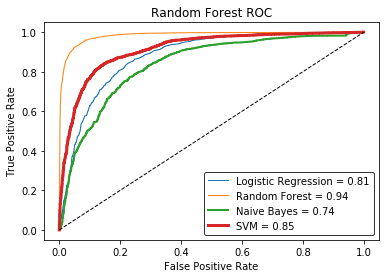

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, predict1)

fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc1 = roc_auc_score(y_test, predict)

fpr2, tpr2, thresholds2 = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
roc_auc2 = roc_auc_score(y_test, predict2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc3 = roc_auc_score(y_test, predict3)

plt.plot(fpr, tpr, lw=1, label='Logistic Regression = %0.2f'%(roc_auc))
plt.plot(fpr1, tpr1, lw=1, label='Random Forest = %0.2f'%(roc_auc1))
plt.plot(fpr2, tpr2, lw=2, label='Naive Bayes = %0.2f'%(roc_auc2))
plt.plot(fpr3, tpr3, lw=3, label='SVM = %0.2f'%(roc_auc3))


plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')